In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
import seaborn as sns 
import re

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy import tag

import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

kkma = Kkma()

In [9]:
data = pd.read_csv('data_result.csv', index_col = 0)
data

,기업명,업종분류,사원수,설립연도,기업규모,매출액,주소,직무,자격요건,직급,이용하는기술스택/우대사항,해당 페이지 URL,기업 홈페이지 URL
0,젭,데이터베이스 및 온라인정보 제공업,NaN,2021.0,NaN,NaN,서울특별시 강남구,소프트웨어 엔지니어,"하나이상의프로그래밍언어를다룰수있는분•새로운지식,기술에대한관심과열정이있으신분•협업과커...",3,"• 멀티 쓰레드와 분할 서버 환경을 이해하시는 분, • 웹소켓 서버에 대한 이해가 ...",https://www.wanted.co.kr/wd/180861,NaN
1,서커스컴퍼니,응용 소프트웨어 개발 및 공급업,20.0,2012.0,중소기업,170563.0,서울특별시 강남구,소프트웨어 엔지니어,"나이/성별/학력/전공무관, 3년이상의웹어플리케이션개발,운영경험, Node,.Net...",0,"- 품질 좋은 소프트웨어 개발을 위해 지속적으로 노력해오신 분, - 객체지향 개발 ...",https://www.wanted.co.kr/wd/207284,www.circuscompany.com
2,블로코,응용 소프트웨어 개발 및 공급업,29.0,2014.0,중소기업,118214.0,경기도 성남시 분당구,소프트웨어 엔지니어,"Golang개발경력2년이상, 대용량데이터,쓰레드프로그래밍에익숙한분",2,"• 블록체인 관련 개발 경험, • 블록체인 스마트 컨트랙트 개발 경험, • 타 언어...",https://www.wanted.co.kr/wd/206690,ww.blocko.io
3,피매치,자연과학 및 공학 융합 연구개발업,NaN,2021.0,NaN,5286.0,서울특별시 성북구,소프트웨어 엔지니어,경력:동종업(AI서비스개발/운영)2년이상또는그에준하는역량을가지신분•대용량데이터활용이...,2,"• 헬스케어 분야에서의 경험이 있으신 분, • 자연어 생성 모델(LLM) 관련 경험...",https://www.wanted.co.kr/wd/186806,www.pmatch.co.kr
4,만나플래닛,응용 소프트웨어 개발 및 공급업,134.0,2016.0,중소기업,1419493.0,서울특별시 구로구,소프트웨어 엔지니어,5년이상JAVA개발경험을가지신분ㆍ팀원들과원할한커뮤니케이션이가능하신분ㆍ스스로할일을정하...,5,"ㆍRest API를 이해하고 API를 개발할 수 있는 분, ㆍGit, redmine...",https://www.wanted.co.kr/wd/206244,www.manna-planet.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,인센드,응용 소프트웨어 개발 및 공급업,NaN,2023.0,NaN,NaN,경기도 성남시 분당구,BI 엔지니어,"경력8년이상•창의성,협동심,도전정신중간에포기하지않는개발자와같이하고싶습니다.",8,"• 개발 및 인력에 대한 리더쉽 소유하신분 , • Full Stack 능력을 가지신분",https://www.wanted.co.kr/wd/195532,NaN
1958,큐픽스,컴퓨터 프로그래밍 서비스업,59.0,2015.0,중소기업,280419.0,경기도 성남시 분당구,루비온레일즈 개발자,석사학위이상의2년이상경력자(혹은이에준하는실력보유자)•전문연구요원(병역특례)신입/전직...,2,• Amazon Web Services 등 클라우드 환경에서 Terraform 등의...,https://www.wanted.co.kr/wd/207738,www.cupix.com
1959,엔비티,광고매체 판매업,77.0,2012.0,중소기업,10251976.0,서울특별시 서초구,루비온레일즈 개발자,"백엔드개발,운영실무6년이상또는그에준하는역량을보유하신분•RESTfulAPI에대한경험및...",6,"• 모바일 광고, 특히 AdTech에 대한 경험이 있으신 분, • Ruby on R...",https://www.wanted.co.kr/wd/177555,www.nbt.com
1960,퍼니지,NaN,NaN,NaN,NaN,NaN,서울 성동구,루비온레일즈 개발자,"학력:무관•경력:백엔드개발3년이상(django,Nest.js,기타백엔드프레임워크)•...",3,"• Ruby on Rails 프로젝트 유경험자, • 앱 서비스를 개발/운영해보신 분",https://www.wanted.co.kr/wd/207959,ad.funeasy.co.kr/AD/funeasy002.php


In [261]:
# kk = ''
# for qqq in data['이용하는기술스택/우대사항'][:200]:
#     kk += ''.join(qqq.replace('•',' ').replace('ㆍ',' ').replace('등',' ').replace('가능한자', ' ').replace('하신분', ' ').replace('해본경험', ' ').replace('해보신분',' ').replace('+\d만원',' ').replace('+\d억',' '))

In [262]:
# stop_words = ''' 하나 분 년 개 수강자유관업무3 분자격요건 단백 룰수 부트 기숙사1년 사택 관적 최대5,000만원 27001 진심인분 취소 유니 있으신분웹퍼블리싱 급경험 여진 때적극적 포기 중간 타시스템과의 분필수자격요건 시멘 틱 지지 기반백 얼 분최소2년 라도 경우채용 중하나라 나라 모든 스플 집착 을경험 1년포함 모집 모집인원 위의조건 개발자로 자로 진심 개발신입 운개발환경 한협업 개발시 호출 3년웹 와이어 랫 폼 동의 액 회원 티비 스킬보유자 부서와의 전반 분수 맥락 징경력 분1년 공감대 안건 고유 누락 부문 설과 실질 전반적 전적 마케 기획이외 면접후결정 자간 소지자 그중 그중1년이상 중2가지 직무 설과인사이트 자타 현상태 기본적인영어문 해력 학분야 팀과의 신약 문제해결능력3 화한 보증금 일 변환 단기 수 있음 수있음 을2년간 분필수요건 지속적인 경험필요 인력 분이벤트로그설계 분개발자 원어 채용프로세스서류전형 2차면접 8년정도 결제 자격사항 지식1 기술과툴을사용해 작성가능6 경우면접 비지급 지급 대중교통 대중교통이동 이동 시외버스 기차 영수증 중 증빙시지원가능 빙시 연고지 기숙사 서의개발경험 졸업예정자 도포함 능력중 마인드모바일 문야 기기 기술서 경력기술서 외지역 력를 얼 아래3가지질문 답변포함 의안 수있음 있음 긍 의안정성 수조건 사업 센터 게신분 이상경력필요 연한 편입 경험자관련경력2 보유자임 졸업증 가지신분백 개발가능4 상황 이상4년이상 사용법 만큼 소양 52 지인 사용자대상 대상 분실무5년 위의 창성 아래의 편입신청 선착순 활용경력 컨셉 편입인원 타인 다회경 주요업무 희망연봉수준기재 사유 가지신분위 구성원 탈 누구 지환 팀원과의 페르 소나 이상경험자 때어려움 하면서변화 지환영 특별 공개 하이신분노션 분사용 모니터링하면서장애 자격제한 하면서 파이 아이디 면접시 해당과제 진행여부 과제진행 1차면접사전 내외부 위한아 분1차면접 관점 파악 한아 그룹 그룹사 자산구매 배포판무관 판무관 육아 의도 심층 급변 년이상실무경험자 휴직 대체 대체사용 구매 분실무경력2 부산 분필수경험 다양한도구들 한도 3년이상제품 성별 의학사이 최소한가지이상 인의 견 '최소1년이상 네트 하이 션에 상위 3년이상서비스 제외 한번 도움 제출 이유 바른 요원가능3년 주제 2회 주제무관 2회이상 접시 손끝 접시준비서류 과목 기본과목 준비 업종 트업 트업문화적응력 엔드개발경험 실무백 필요역량스택 이상백 게이 룰 창업멤버 시대 스타트업5,000억 7년내 멤버 3개이상 기반실무개발경력 기본적인이해 7급 명 이상유경험자 리드 800급 800 중최소1개 구조대신 대신 분기술스택 밍구현능력 제이 32 3개 기초적인프로 중가능 언어1개이상 언어중 내의 10년내의 기반하 반하 두려움 분전자 재현 깊이 의식 중이 수원 지역 이상12년이하 다음기술 6.0 무리 이상우대사항 외하나 당황 컴퓨터공학과학사이 개발자체 믿음 정신과 대우 배치 끝 과합리적 운영경험최소3 공통 공통기능 용성 업계최고대우 공학과 이력서상희망연봉 킹 마이 희망 기재필수학 1.8이상 관련업무경력5 자격요건 분성별무관 년이상기술스택 키오스 가능자7 환경하 1.8 경하 보유자5 활용가능자6 자백 분만4년이상 가지신분만8년 있으 있으신분 참여를 시분 학습의지5년 계신분 미들 안드로 실제최소3명 년이상경험 폴리오 분경력3년 미만 부심 필수사전질문 트웰브 년이상경력자관련 채용프로세스 근무장소 장소 채용절차 이상서비스 과의사소통 경우관련학과학 계속 기존 중이신분 활용가능자4 제로 가지신분통사항 분통 아시 보람 디버 흥미 초기 담장자 때담당자 구멍 일의 일의구멍 지금 단시간 내몰입 조직내 사이 2주단위 당업무 분최소4년 내재 분금융 개발충 간원활 자사 의협업경험 기개발 회사성공 숙지 초기스타트 마련 선아래 기대 분로그 경험2 렌치 베 디 부담 모두 기구 최소하나 기구축 모두가능 면접접차 직군과의 과의원활 접근 구두 소지 지속 셰 신분3 처리 이상가능 후배 분경력5년 7인이상규모 케이션역량 케이션설계 스터링 위경험 트개 721 전체 반응 분최소5년 코드적극적 의향 스를구 업환경이익숙하 실무진 진행 진행가능 1차인터뷰이후 010 5596 0870 승 대표 1콜챗 연락 연락주세요 세요 우리팀 지원이전 지원시지원서 시지 직전연봉 유의미 명시 확신 언제  최종합격순 실무인터뷰 아래질문 2차대면면접 우신분 최신스펙에대 욕심 분7년이상 힘 욕구 기타언어하나 이상7년이하 플리케이션 마음씨 페이지 주세 선호 구현경험 구조 팀인터뷰 자유양식 파일권장 혼자 공인 결과물 중심 본인만 외조직 컨트 를연결 인원 업자 고용 고용형태 급여변동 변동 서울시 서울시용산구이태원로 서류전형 1차기술과제 기술인터뷰 인터뷰 3.1 맵수 주2 3회 원리 업무수행가능자 2015 항목 취득 협의후결정학력 년이상자 이상자 항목중 이력서내 연봉필수기재 주5일 금 시차 근무일시 근무형태 근무조건 중최소한 분03 03 90 90일내발급 발급 서가 분04 04 05 이해4 이풍 머 풀이가능 1억원3 도환영 환영 롤 2기반 젠 간의 내가 12 유경험자 과적 방법 방식 24시간 미니 형태 확인 3기본지식 배경 혼합 외언어 부족 말 캐치 충족 충족가능 총백 요원 요건 년이상경력 어가 핀 셋 체감 피력 상대 고려 일정 의가 독성 기반웹 무엇인가 인가 즐거움분초 이상5년이하 가치 분우대 팀내외 내외 분풀 고성 갈구고성 내고 조건 분초대졸이상 관계 이공 분대졸 과적극적 53 실무5년차이 극적 팀내 자도구 도적 부서 타부서 컴퓨터 신분2 구분 지향 12년 내가작성 차장2 차이상의 3가능 자일 해당공고 기업내 2024 2024년2월 노 하우 처음 원의 원의성장 카 2022 2022년2월 한테스트 성격 전직 시유 대한 텍쳐에 수준 공용 과도 메인 글 각각 종류 통해 한어 필요하다 이번 15년이상 13 간의 대면 칭 채용 타파트 가실 5.0 십 가능자 셀 사양산 가실분 및브 릿 제한 입자 분경력8년 신청 8.1 보유필수 기타 웍 개발4 분지원가능 2017이후 2017 스펙에 저희 현재 인지 곳 신입기준연봉4,000 과의원할 브라 연봉범위 4000 6000 우징 리작성 에이 전시 10년이상 4,000 후협의 실시간 최소1개이상 신분4 7년이상3 몰 교 338 동702호 702 협의 면접 한시스템 3년이하 연봉3,000만원 중1가지이상 1시간 을이과정 군의 직군의사람 안주 처우 처우협의 입사예정일 예정일 확정 분1 9중하나이상 상태 결격 입장 6이상 급 용산 용산구 이태 원로 4년이상3 27 27길39 39 11 질문답변 3줄정도 줄 보신백 기반개발경력3 시점 지원자분의회사선택 3가지 분의 계신향후 향후 골 무엇 계신지식 정도 지원서 스합류에 무엇 계신부분 부분 우려 답변 2층 층 2차 최종합격 아래필수사 질문 합격 상세경 세경 1차코딩테스트 2명3년 안 드로 이드 제작 도로 태도로 우수 실패 대인 이야기 화면 이외 이내 갈분 애착 시도 16 인사 고와 절차 최대 이후 전형 이후단계 기능 필수적 육성 심사 스크 유저 분하나 중한개이상의사용 상의 그것 후재발방지 서버프로 어에 밍언어에 개인 이상전자 비즈니스요구사항 분3년이상 행복 급여 통합 추구 심도 후 개월 6개월사용기간 검토 여부 때행복 생성 10,000장이상 경우포함 런스문서 과오 언더 실내 264 265 수립 을 아래 달리 득능력 관행 템복잡도의 도의 운툴 중요 적용경험 연동 건강 불가 및운영  거시 와의 하다 문법사용 3사용경험 분신입 중요하다 성년자 을통 고민 고가 기재 지원시 어필 7년차 제학 논의 전공자최소 분관련경력3 저널 체제 치트 용화 소켓 그래밍경력 객체 지도 사람 세대 사람과의 분6년이상 양식 자유 입사 서류 지원서 입사지원서 소개서 코치 필요시 모습 중시 과의 해외여행 바탕 런경험 최소한가지 실제 중인 해본 분야 런스 문서 작성 분7 분3 실제운영중인서비스 \d개이상 2개이상 표준 케이션개발경험 경험보유 시장 순위 분개발경력4 풀이 불확실 예정자 남성 지원 기반개발업무경험 상용 한가지이상 15 15년 운영해 풀이경험 풀이 영해 다수 부설 처 중한가지이상언어 학과 계열 이제공 각종 숙자 졸업 중하나이상 프로토 콜 벡 라인 분시드 한자 보유한자 때문 덱싱 분6 소통하면 하면 오버 지양 적정 자기주 분빅 규격 빅 뷰 작용 상호 징 사항 능숙자 분6 1년이상인분 상응 인분 스타트 동작 키 텍 포함 마크 지경 지경험이 험이  명세 명세서에 서에 내부 외부 분학력 한가지 개발이익숙하 장애발생시 오너쉽이 무관 쉽이 이하 년이하 소프트 웨어 문화 5년이상7 리지 스토 재발 방지 시하 우선시하 움 분웹 겸비 분4년이상 이상근무 근무 사용기초 학력무관경력5 단위 동기 비동기이해 분5년이상 서의 발란 물 14 검색 사랑 분2년이상 분분업 주저 시스템 동종 때발 실무 분기본적인 등다량 다량 보신 유관 연봉5,000만원 분필수언어 요소 95 100 100점 점 레벨이상 스택대응 거부감 번 6 7 업계 연봉 000만원 연공5,000만원 스톡3,000만원 3,000 5,000 8,000 8,000만원 1억원이미지 억 이용해보신분 커뮤니케이션능력 모니터링경험 우선 분원 분원활 과제 데 항상 라면 도입 라면툴 거리낌 본인 최고 팔로 마음가짐 내용 해당내용 설파 전파 관련 컨테이너빌드 하나이상 소유자고객문제해결 의사 프로그래밍 분대 빌드 솔루션구축경험4 소스 이자 소유자 위해고객 적용 위해 4 년대 년대졸자 졸자 이상프로덕트 역할 기본 기쁨 불필요 본문제 워크 등딥러닝 계신 때 공자 80 역량보유 해당 중 중1개이상  습득 등 수 수 자 뮤 용량 이상경험 연봉5 동종업계경력6 우대 향상 실력다양 이해프레임 구성 자체 대외 최소5명이상 신분 티 브앱 시작 이용 보유 스킬 분경력 일 케이 원활 케이션 컴퓨팅환경 자격보유 자신 상상 야만족 최소 1가지이상 사용가능 분최소3년 자격 10,000 10,000 장 본분 프롬 프롬프 직접 값 값0.1 0.1 속 차이 하나하나 사전 허브 런 킨스 런분과 경우군필자 분과 무자 필자 개이상언어의사 분2 필수 필수사용자 사용자 툴 션 엔드개발경력3 2년이상 분백 엔드 형성 촉진 형상 의지소유자 수행 도구 가지신분대용량 그 활용 기술 케이션개발 워크개발 능숙하신분5 년이상보유 화가 초대 화가가능 생태계 운기술 10년 분기 분기초적 초적 해보 간 케이션능력 기초 러 스터 기반 참여 요구 역량 오픈 적인 3년이상 성공지표 지표 만 만5년이상 과장2 싸이클 가지신 등 선도 팀원 가능 종업 축하 사용 프레임 동 플리 보유자 성공 스스로 사용능력 언어 관심 새 직군 서비스'''
# word_tokens = kkma.nouns(kk)

# result = [word for word in word_tokens if not word in stop_words]

# print('불용어 제거 전 :',word_tokens) 
# print('불용어 제거 후 :',result)

<function matplotlib.pyplot.show(close=None, block=None)>

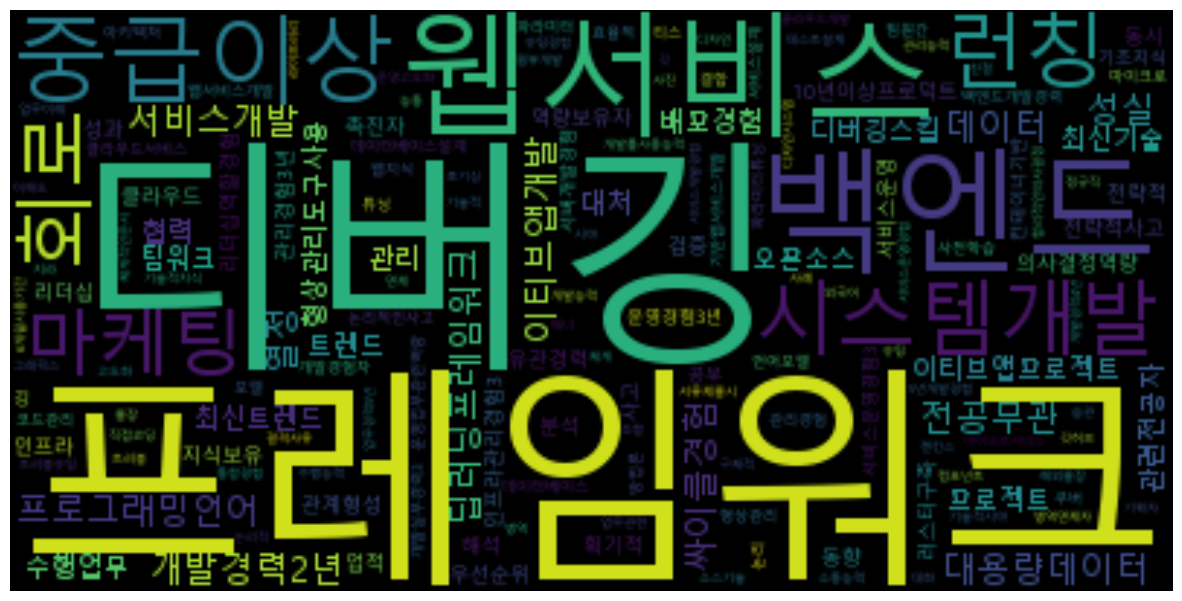

In [263]:
# plt.figure(figsize=(15, 10))
# wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(result))
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.show

In [20]:
result_a = []

for qqq in data.자격요건:
    kk = ''.join(qqq.replace('•',' ').replace('ㆍ',' ').replace('등',' ').replace('가능한자', ' ').replace('하신분', ' ').replace('해본경험', ' ').replace('해보신분',' ').replace('+\d만원',' ').replace('+\d억',' '))
    stop_words = ''' 하나 분 년 개 수강자유관업무3 분자격요건 단백 룰수 부트 기숙사1년 사택 관적 최대5,000만원 27001 진심인분 취소 유니 있으신분웹퍼블리싱 급경험 여진 때적극적 포기 중간 타시스템과의 분필수자격요건 시멘 틱 지지 기반백 얼 분최소2년 라도 경우채용 중하나라 나라 모든 스플 집착 을경험 1년포함 모집 모집인원 위의조건 개발자로 자로 진심 개발신입 운개발환경 한협업 개발시 호출 3년웹 와이어 랫 폼 동의 액 회원 티비 스킬보유자 부서와의 전반 분수 맥락 징경력 분1년 공감대 안건 고유 누락 부문 설과 실질 전반적 전적 마케 기획이외 면접후결정 자간 소지자 그중 그중1년이상 중2가지 직무 설과인사이트 자타 현상태 기본적인영어문 해력 학분야 팀과의 신약 문제해결능력3 화한 보증금 일 변환 단기 수 있음 수있음 을2년간 분필수요건 지속적인 경험필요 인력 분이벤트로그설계 분개발자 원어 채용프로세스서류전형 2차면접 8년정도 결제 자격사항 지식1 기술과툴을사용해 작성가능6 경우면접 비지급 지급 대중교통 대중교통이동 이동 시외버스 기차 영수증 중 증빙시지원가능 빙시 연고지 기숙사 서의개발경험 졸업예정자 도포함 능력중 마인드모바일 문야 기기 기술서 경력기술서 외지역 력를 얼 아래3가지질문 답변포함 의안 수있음 있음 긍 의안정성 수조건 사업 센터 게신분 이상경력필요 연한 편입 경험자관련경력2 보유자임 졸업증 가지신분백 개발가능4 상황 이상4년이상 사용법 만큼 소양 52 지인 사용자대상 대상 분실무5년 위의 창성 아래의 편입신청 선착순 활용경력 컨셉 편입인원 타인 다회경 주요업무 희망연봉수준기재 사유 가지신분위 구성원 탈 누구 지환 팀원과의 페르 소나 이상경험자 때어려움 하면서변화 지환영 특별 공개 하이신분노션 분사용 모니터링하면서장애 자격제한 하면서 파이 아이디 면접시 해당과제 진행여부 과제진행 1차면접사전 내외부 위한아 분1차면접 관점 파악 한아 그룹 그룹사 자산구매 배포판무관 판무관 육아 의도 심층 급변 년이상실무경험자 휴직 대체 대체사용 구매 분실무경력2 부산 분필수경험 다양한도구들 한도 3년이상제품 성별 의학사이 최소한가지이상 인의 견 '최소1년이상 네트 하이 션에 상위 3년이상서비스 제외 한번 도움 제출 이유 바른 요원가능3년 주제 2회 주제무관 2회이상 접시 손끝 접시준비서류 과목 기본과목 준비 업종 트업 트업문화적응력 엔드개발경험 실무백 필요역량스택 이상백 게이 룰 창업멤버 시대 스타트업5,000억 7년내 멤버 3개이상 기반실무개발경력 기본적인이해 7급 명 이상유경험자 리드 800급 800 중최소1개 구조대신 대신 분기술스택 밍구현능력 제이 32 3개 기초적인프로 중가능 언어1개이상 언어중 내의 10년내의 기반하 반하 두려움 분전자 재현 깊이 의식 중이 수원 지역 이상12년이하 다음기술 6.0 무리 이상우대사항 외하나 당황 컴퓨터공학과학사이 개발자체 믿음 정신과 대우 배치 끝 과합리적 운영경험최소3 공통 공통기능 용성 업계최고대우 공학과 이력서상희망연봉 킹 마이 희망 기재필수학 1.8이상 관련업무경력5 자격요건 분성별무관 년이상기술스택 키오스 가능자7 환경하 1.8 경하 보유자5 활용가능자6 자백 분만4년이상 가지신분만8년 있으 있으신분 참여를 시분 학습의지5년 계신분 미들 안드로 실제최소3명 년이상경험 폴리오 분경력3년 미만 부심 필수사전질문 트웰브 년이상경력자관련 채용프로세스 근무장소 장소 채용절차 이상서비스 과의사소통 경우관련학과학 계속 기존 중이신분 활용가능자4 제로 가지신분통사항 분통 아시 보람 디버 흥미 초기 담장자 때담당자 구멍 일의 일의구멍 지금 단시간 내몰입 조직내 사이 2주단위 당업무 분최소4년 내재 분금융 개발충 간원활 자사 의협업경험 기개발 회사성공 숙지 초기스타트 마련 선아래 기대 분로그 경험2 렌치 베 디 부담 모두 기구 최소하나 기구축 모두가능 면접접차 직군과의 과의원활 접근 구두 소지 지속 셰 신분3 처리 이상가능 후배 분경력5년 7인이상규모 케이션역량 케이션설계 스터링 위경험 트개 721 전체 반응 분최소5년 코드적극적 의향 스를구 업환경이익숙하 실무진 진행 진행가능 1차인터뷰이후 010 5596 0870 승 대표 1콜챗 연락 연락주세요 세요 우리팀 지원이전 지원시지원서 시지 직전연봉 유의미 명시 확신 언제  최종합격순 실무인터뷰 아래질문 2차대면면접 우신분 최신스펙에대 욕심 분7년이상 힘 욕구 기타언어하나 이상7년이하 플리케이션 마음씨 페이지 주세 선호 구현경험 구조 팀인터뷰 자유양식 파일권장 혼자 공인 결과물 중심 본인만 외조직 컨트 를연결 인원 업자 고용 고용형태 급여변동 변동 서울시 서울시용산구이태원로 서류전형 1차기술과제 기술인터뷰 인터뷰 3.1 맵수 주2 3회 원리 업무수행가능자 2015 항목 취득 협의후결정학력 년이상자 이상자 항목중 이력서내 연봉필수기재 주5일 금 시차 근무일시 근무형태 근무조건 중최소한 분03 03 90 90일내발급 발급 서가 분04 04 05 이해4 이풍 머 풀이가능 1억원3 도환영 환영 롤 2기반 젠 간의 내가 12 유경험자 과적 방법 방식 24시간 미니 형태 확인 3기본지식 배경 혼합 외언어 부족 말 캐치 충족 충족가능 총백 요원 요건 년이상경력 어가 핀 셋 체감 피력 상대 고려 일정 의가 독성 기반웹 무엇인가 인가 즐거움분초 이상5년이하 가치 분우대 팀내외 내외 분풀 고성 갈구고성 내고 조건 분초대졸이상 관계 이공 분대졸 과적극적 53 실무5년차이 극적 팀내 자도구 도적 부서 타부서 컴퓨터 신분2 구분 지향 12년 내가작성 차장2 차이상의 3가능 자일 해당공고 기업내 2024 2024년2월 노 하우 처음 원의 원의성장 카 2022 2022년2월 한테스트 성격 전직 시유 대한 텍쳐에 수준 공용 과도 메인 글 각각 종류 통해 한어 필요하다 이번 15년이상 13 간의 대면 칭 채용 타파트 가실 5.0 십 가능자 셀 사양산 가실분 및브 릿 제한 입자 분경력8년 신청 8.1 보유필수 기타 웍 개발4 분지원가능 2017이후 2017 스펙에 저희 현재 인지 곳 신입기준연봉4,000 과의원할 브라 연봉범위 4000 6000 우징 리작성 에이 전시 10년이상 4,000 후협의 실시간 최소1개이상 신분4 7년이상3 몰 교 338 동702호 702 협의 면접 한시스템 3년이하 연봉3,000만원 중1가지이상 1시간 을이과정 군의 직군의사람 안주 처우 처우협의 입사예정일 예정일 확정 분1 9중하나이상 상태 결격 입장 6이상 급 용산 용산구 이태 원로 4년이상3 27 27길39 39 11 질문답변 3줄정도 줄 보신백 기반개발경력3 시점 지원자분의회사선택 3가지 분의 계신향후 향후 골 무엇 계신지식 정도 지원서 스합류에 무엇 계신부분 부분 우려 답변 2층 층 2차 최종합격 아래필수사 질문 합격 상세경 세경 1차코딩테스트 2명3년 안 드로 이드 제작 도로 태도로 우수 실패 대인 이야기 화면 이외 이내 갈분 애착 시도 16 인사 고와 절차 최대 이후 전형 이후단계 기능 필수적 육성 심사 스크 유저 분하나 중한개이상의사용 상의 그것 후재발방지 서버프로 어에 밍언어에 개인 이상전자 비즈니스요구사항 분3년이상 행복 급여 통합 추구 심도 후 개월 6개월사용기간 검토 여부 때행복 생성 10,000장이상 경우포함 런스문서 과오 언더 실내 264 265 수립 을 아래 달리 득능력 관행 템복잡도의 도의 운툴 중요 적용경험 연동 건강 불가 및운영  거시 와의 하다 문법사용 3사용경험 분신입 중요하다 성년자 을통 고민 고가 기재 지원시 어필 7년차 제학 논의 전공자최소 분관련경력3 저널 체제 치트 용화 소켓 그래밍경력 객체 지도 사람 세대 사람과의 분6년이상 양식 자유 입사 서류 지원서 입사지원서 소개서 코치 필요시 모습 중시 과의 해외여행 바탕 런경험 최소한가지 실제 중인 해본 분야 런스 문서 작성 분7 분3 실제운영중인서비스 \d개이상 2개이상 표준 케이션개발경험 경험보유 시장 순위 분개발경력4 풀이 불확실 예정자 남성 지원 기반개발업무경험 상용 한가지이상 15 15년 운영해 풀이경험 풀이 영해 다수 부설 처 중한가지이상언어 학과 계열 이제공 각종 숙자 졸업 중하나이상 프로토 콜 벡 라인 분시드 한자 보유한자 때문 덱싱 분6 소통하면 하면 오버 지양 적정 자기주 분빅 규격 빅 뷰 작용 상호 징 사항 능숙자 분6 1년이상인분 상응 인분 스타트 동작 키 텍 포함 마크 지경 지경험이 험이  명세 명세서에 서에 내부 외부 분학력 한가지 개발이익숙하 장애발생시 오너쉽이 무관 쉽이 이하 년이하 소프트 웨어 문화 5년이상7 리지 스토 재발 방지 시하 우선시하 움 분웹 겸비 분4년이상 이상근무 근무 사용기초 학력무관경력5 단위 동기 비동기이해 분5년이상 서의 발란 물 14 검색 사랑 분2년이상 분분업 주저 시스템 동종 때발 실무 분기본적인 등다량 다량 보신 유관 연봉5,000만원 분필수언어 요소 95 100 100점 점 레벨이상 스택대응 거부감 번 6 7 업계 연봉 000만원 연공5,000만원 스톡3,000만원 3,000 5,000 8,000 8,000만원 1억원이미지 억 이용해보신분 커뮤니케이션능력 모니터링경험 우선 분원 분원활 과제 데 항상 라면 도입 라면툴 거리낌 본인 최고 팔로 마음가짐 내용 해당내용 설파 전파 관련 컨테이너빌드 하나이상 소유자고객문제해결 의사 프로그래밍 분대 빌드 솔루션구축경험4 소스 이자 소유자 위해고객 적용 위해 4 년대 년대졸자 졸자 이상프로덕트 역할 기본 기쁨 불필요 본문제 워크 등딥러닝 계신 때 공자 80 역량보유 해당 중 중1개이상  습득 등 수 수 자 뮤 용량 이상경험 연봉5 동종업계경력6 우대 향상 실력다양 이해프레임 구성 자체 대외 최소5명이상 신분 티 브앱 시작 이용 보유 스킬 분경력 일 케이 원활 케이션 컴퓨팅환경 자격보유 자신 상상 야만족 최소 1가지이상 사용가능 분최소3년 자격 10,000 10,000 장 본분 프롬 프롬프 직접 값 값0.1 0.1 속 차이 하나하나 사전 허브 런 킨스 런분과 경우군필자 분과 무자 필자 개이상언어의사 분2 필수 필수사용자 사용자 툴 션 엔드개발경력3 2년이상 분백 엔드 형성 촉진 형상 의지소유자 수행 도구 가지신분대용량 그 활용 기술 케이션개발 워크개발 능숙하신분5 년이상보유 화가 초대 화가가능 생태계 운기술 10년 분기 분기초적 초적 해보 간 케이션능력 기초 러 스터 기반 참여 요구 역량 오픈 적인 3년이상 성공지표 지표 만 만5년이상 과장2 싸이클 가지신 등 선도 팀원 가능 종업 축하 사용 프레임 동 플리 보유자 성공 스스로 사용능력 언어 관심 새 직군 서비스'''
    word_tokens = kkma.nouns(kk)
    word_temp_1 = [word for word in word_tokens if word not in stop_words]
    result_a.append(', '.join(word_temp_1))

data['a'] = result_a

result_b = []

for www in data.자격요건:
    word_temp_2 = re.findall(r'[a-zA-Z\s]+', www)
    result_b.append(', '.join(word_temp_2))

data['b'] = result_b

data['c'] = data['a'] + ', ' + data['b']

data.drop(columns=['a','b'], inplace = True)
data.drop(columns=['자격요건'], inplace = True)
data.rename(columns={'c':'자격요건'}, inplace = True)

경력:동종업(AI서비스개발/운영)2년이상또는그에준하는역량을가지신분•대용량데이터활용이가능하신분•Python,Tensorflow,Pytorch등딥러닝프레임워크개발에능숙하신분
서비스개발, 데이터, 딥러닝프레임워크, AI, Python, Tensorflow, Pytorch


In [25]:
data

,기업명,업종분류,사원수,설립연도,기업규모,매출액,주소,직무,직급,이용하는기술스택/우대사항,해당 페이지 URL,기업 홈페이지 URL,자격요건
0,젭,데이터베이스 및 온라인정보 제공업,NaN,2021.0,NaN,NaN,서울특별시 강남구,소프트웨어 엔지니어,3,"• 멀티 쓰레드와 분할 서버 환경을 이해하시는 분, • 웹소켓 서버에 대한 이해가 ...",https://www.wanted.co.kr/wd/180861,NaN,"프로그래밍언어, 열정, 성실,"
1,서커스컴퍼니,응용 소프트웨어 개발 및 공급업,20.0,2012.0,중소기업,170563.0,서울특별시 강남구,소프트웨어 엔지니어,0,"- 품질 좋은 소프트웨어 개발을 위해 지속적으로 노력해오신 분, - 객체지향 개발 ...",https://www.wanted.co.kr/wd/207284,www.circuscompany.com,"전공무관, , , Node, Net, Nginx, Apache, SystemD..."
2,블로코,응용 소프트웨어 개발 및 공급업,29.0,2014.0,중소기업,118214.0,경기도 성남시 분당구,소프트웨어 엔지니어,2,"• 블록체인 관련 개발 경험, • 블록체인 스마트 컨트랙트 개발 경험, • 타 언어...",https://www.wanted.co.kr/wd/206690,ww.blocko.io,"개발경력2년, 대용량데이터, 데이터, Golang,"
3,피매치,자연과학 및 공학 융합 연구개발업,NaN,2021.0,NaN,5286.0,서울특별시 성북구,소프트웨어 엔지니어,2,"• 헬스케어 분야에서의 경험이 있으신 분, • 자연어 생성 모델(LLM) 관련 경험...",https://www.wanted.co.kr/wd/186806,www.pmatch.co.kr,"서비스개발, 데이터, 딥러닝프레임워크, AI, Python, Tensorflow, ..."
4,만나플래닛,응용 소프트웨어 개발 및 공급업,134.0,2016.0,중소기업,1419493.0,서울특별시 구로구,소프트웨어 엔지니어,5,"ㆍRest API를 이해하고 API를 개발할 수 있는 분, ㆍGit, redmine...",https://www.wanted.co.kr/wd/206244,www.manna-planet.com,", JAVA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,인센드,응용 소프트웨어 개발 및 공급업,NaN,2023.0,NaN,NaN,경기도 성남시 분당구,BI 엔지니어,8,"• 개발 및 인력에 대한 리더쉽 소유하신분 , • Full Stack 능력을 가지신분",https://www.wanted.co.kr/wd/195532,NaN,"경력8년이상, 창의성, 협동심, 도전, 도전정신,"
1958,큐픽스,컴퓨터 프로그래밍 서비스업,59.0,2015.0,중소기업,280419.0,경기도 성남시 분당구,루비온레일즈 개발자,2,• Amazon Web Services 등 클라우드 환경에서 Terraform 등의...,https://www.wanted.co.kr/wd/207738,www.cupix.com,"석사, 석사학위이상, 학위, 2년이상경력자, 실력보유자, 전문, 전문연구요원, 연구..."
1959,엔비티,광고매체 판매업,77.0,2012.0,중소기업,10251976.0,서울특별시 서초구,루비온레일즈 개발자,6,"• 모바일 광고, 특히 AdTech에 대한 경험이 있으신 분, • Ruby on R...",https://www.wanted.co.kr/wd/177555,www.nbt.com,"백엔드개발, 운영실무6년, 이해도, 외부서비스, 조직이제공, 내부시스템, 트래픽, ..."
1960,퍼니지,NaN,NaN,NaN,NaN,NaN,서울 성동구,루비온레일즈 개발자,3,"• Ruby on Rails 프로젝트 유경험자, • 앱 서비스를 개발/운영해보신 분",https://www.wanted.co.kr/wd/207959,ad.funeasy.co.kr/AD/funeasy002.php,"백엔드개발3, 기타백엔드프레임, 통합테스트, 코드작성경험, django, Nest,..."


<function matplotlib.pyplot.show(close=None, block=None)>

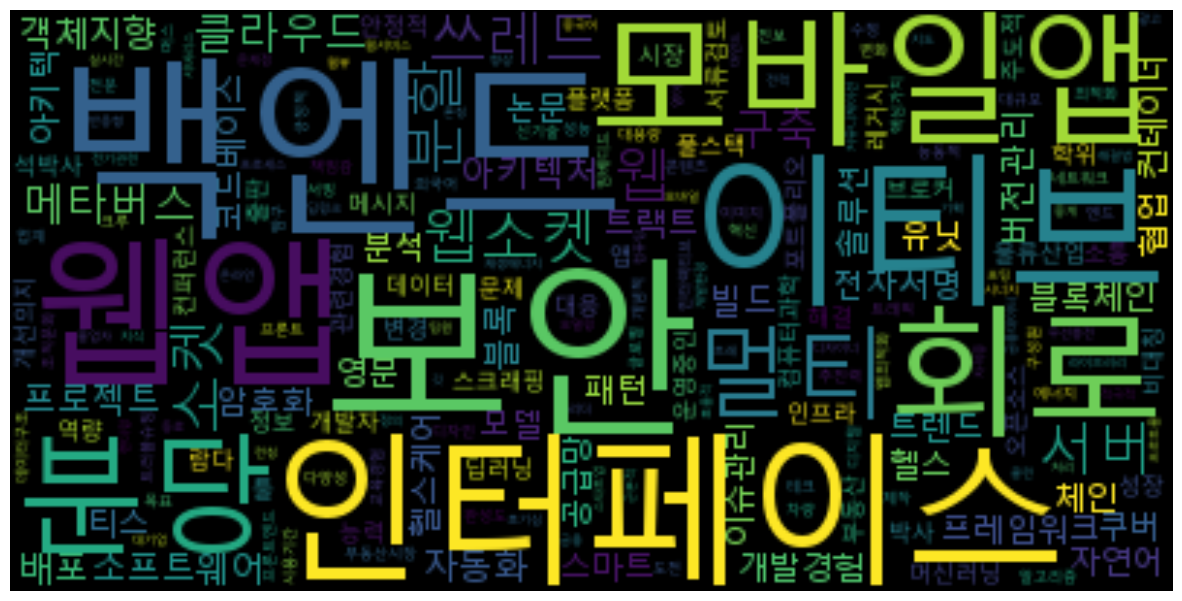

In [47]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(result_1))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [54]:
ll = ''
for www in data['이용하는기술스택/우대사항']:
    ll += ''.join(www.replace('•',' ').replace('ㆍ',' ').replace('등',' ').replace('가능한자', ' ').replace('하신분', ' ').replace('해본경험', ' ').replace('해보신분',' ').replace('+\d만원',' ').replace('+\d억',' '))



stop_words_1 = '''이해 분 관심 소프트 품질 노력 코드 건전 1회 사내 저녁 후생비 저녁식대 야간 생일 결혼기념일 분당 스마트 변경 시장 27701 유기 5인 실시 활성화 점수 성남 성남시 분당 촌 연세대 연세대학교 2곳 곳 분당 분당구 판교 723 404 404호 서대문 서대문구 연세 광 광혜관 라온 메디 스테이지 차피 4918 회수 의의 동반 축하 부모 경조사비 조사비 자율복장 복장 회사콘도 콘도 육아 워크샵 샵 격년 테니스 조사용품 용품 포상 10년 포상금 여름 부서별 회식비 음료 각자 개개인 주인 굿 준수 좋아 7년 무엇인가 인가 콘 솔 다루 커피챗 브렌 전략 장기근속 근속 장기 서울시 사용기간 소유자 보유자 2가지 스타일 팬 덤 분실무 견고 분우대사항 달성 지속가능 기법 존중 결정 근무환경 포구 중간 활동  중간관리자 관리자 직장 요원 더쉽 가지신분 근거주자 주자 장기근무가능자 대인 직업 훈련 기관 직업훈련기관 효과적인 인재 인재영입 영입 매니저와의 와의 주의 주의사항 동일 복리 복리후생 후생 일반적 운동 행복 행복하자 하자 몸 두시 기업내 커리어 여의대 108 파크 파크원 타워1 38 38층 상위 연봉 오전 11 11시 생략 연결 쇼핑 퇴직금 연차 연차휴가 모성 모성보호휴가 경조사 경조휴가 경조금 조금 화환 효과 피해자 오신 최선의 선의 대안 지인 시일 담당자 연락 방안 컨트리 컨트리뷰 무관 비용절감 절감 부담 휴양 핀 브라 우징 부탁 방법 위주 수행업무 개인홈페이지 홈페이지 1시간 정식 암호 화폐 어린이 슬픔 화곡 기쁨 장례 지인분 1년 여정 비어 90 90분 스킬 인상 셰어 라운드 6개월 있음 최소화 주민 주민번호 번호 개인정보 삭제 요함 중단 어제 오늘 이것 선배 설명 표현 안정성 삶 몰입 종속 일정 산정 2회 포지션 편안 출근버스 대중교통 운행 주택 주택자금대출 자금 통근 공간 단체보험제도 3인이상 경청 보완 사기 열정 포토 파이어 확정 주기 즉시 용인 원활 동작 용인시 수지구 09 상여금 업무우수자 기혼 기혼직원 식사 청년 내일 음공제 공제 18일 미사용시 사용시 수당 상금 임직원 건강검진비 보조 소개서 옵션 톤 해커 참여해본 전직 모두 현역 불가 본인만 바른 예정경력기술서 기술서 필요시 셜 3인 습관화 현지 메시 회복 의료비 단체보험 차이점 지가 임원진 대신 과제테스트 식비 10만 상당 건강비 교육비 정기 리프 리프레쉬 쉬 독서 독서모임 모임 시즌 멤버쉽단체 고객사 조화 주차 이자지원제도 이자 주거 대출 유의사항 최종결과 전월세 모집 조기 동의 허위사실 비지능 구매 부족 실적 모노 회의 공감 답변 명령 미들 설치 숙박 학점 학점은행 은행 성취감 선호해 호해 벡 문화적 검사 추가 유연 유연근무제도 제도 셋째 셋째주 금요일 1시 넷째 넷째주 월요일 출근 롱 롱위켄트 켄드 야근 식대 심야 교육지원 2년시 채널 튜브 관제 대한 계속 랍격자 수시 마감 3년이상 365 보수성 친숙 복지비 휴가비 통신비 종합건강검진 이해심 모범 애정 순위 엣 귀하 사회 이바지 라도 분1 만들기 13버전 엘 스틱 리초트 급여보장 초과 링크 뮤 우수자 버전 중앙 습득 참가 학술 게재 파이프 준비 요구사항 단계 추천해 공통 해당 국가 유공자 장애인 취업 취업보호대상자 대상자 관계법령 법령 7일 며칠 헥 날 시작 혜택 개선해본 현재 이내 이메일 간의 리팩 토스 플레이스 함 창업 처우조건 포스 타입 내규 1일 8시간 수습조건 근무장소 장소 4길 강남역 1번 출구 2분 지원시 참고 참고사항 모든 권장 성공 사례 포함 현장 손 소정 참여비 간소화 4년 성과 블랙 박스 자격 취득자 투브 이외 라우드 워크플 넷 신규 체계화 장려 석식 신청 커피 무제한 동급 장비 제품 퇴근 교통비 연말 겨울 방학 별도 승인 워라 보장 재택근무 비용 도서 구입 수업 환경 케어 중시 펀 마크 비전 중요성 신분 출퇴근 근무시간 조정 동시 해외여행 결격 의사 관적 유사 유지 보수 지면 264 탑재 보호 사원 우수 기본적인 지급 결격사유 시용 사유 운전 글 페이스 북 4인 전체 접속 2,000 2,000명 수용 뉴 럴 자율 주행 지리 체계 카페테리 테리 건강 검진 경조 수원 위치 고용 고용형태 검출 추적 86 64 버싱 전형절차 면접 제출서류 사지원서 지원서 양식 명절 선물 동호회 종합검진 독감 독감주사 마이 제외 모습 부여 센터 센터필드 필드 타워 교육장 경기 경기도 우대요건 요건 규모 소지자  13482주사 국내 출산 자녀 입학 포 비즈 니스 요청사항 후속 영업 끈기 관점 소유 도입 필요 경진 검수 반영 인식 지원자 안식 휴가 지원금 6년 9 9년 근속 현금 복지 포인트 편의 시설 녀 수면 수면실 간식 휴식 카페 성향 추구 결과물 연구팀장 팀장 인력 분 지향 작성 버스 재직 근무요일 체제 부서 우선 정리 읽기 쓰기 구상 독성 유니 영역 의식 전장 26262 특성 규칙 중점적 지표 유의미 고가 용성 졸업 수자 역할 번 관련교육 2년 신용 장애 산업과 수자1 4 분관련학과졸업 상응 동종 전사 유의 리드해본 구분 화면 오너 십 본인 파트 지능 발전 편집 욕망 거리 기타 크립 서비스여 혼자 집 벨 벨루가 루가 큐칙 주류 산없과 기능 분과 대상 인공 제안구애 주요 작업 시험 일부 최소 3개 1개 플 케이 인더스 트리 요구 운 영해 운영해 가능자1 너리 취약 뿐 중요시 빅 상태 비 실행 반복 레드 요청 일상 파 파티 응용 셋 진심 기업 실제 대체 분위기 자기주 다량 만족 중요 여기 실패 창의 방향 구조적 활용해 용해 각종 주도 자기 사이트 종사 수준 맥락 통합적 설계해본 요일 극복 후보자 치열 논의 수준의 커버 리지 다수 유저 오스 결제 플랫 펌 드로 이드 추천 다각 다각도로 도로 오피스 총괄 참석 전반적 핏 내부 상황 변동 내용 스스로 설득 시간 체크 합류 종합적 영향 필수 주소 선택 형시 1로 로 최대 등기 확인 앞 기대 실무진 대면 60 60분 가량 중심적 이야기 자리 시도 5일 일 40 40시간 7시 30 30분-10시 -10 30분 처우 보상 개인 바탕 협의해 절차 입사 입사지원 지원 재직해본 형성 누비 랩 개발팀 8 다음 션 근무지 서울특별 서울특별시 625 덕명 덕명빌딩 6층 삼성 삼성역 도보 3분  최고 장벽 기준 사업부 자체 프로 동안 급여 100 지금 평가 연장 종료 과정 제출 증빙 증빙자료 자료 사실 허위 기재 발견 취소 콜 8 론 재미 직군 사용가능 통해 자유 공학 기본 장단점 채용 실무 경영진 경우 3개월 수습 수습기간 적인 리스 꿈 우리 초기 스타트 업 개발실장 실장 개발본부장 본부장 사랑 일 원 우대사항 사항 접목 가능자 런 칭 3년 사업 직무 발생 때 법 모색 처음 끝 1인 출시 경제력 기존 저하 으 항상 고심 표준 반응 진행 웨어 메타 지속적 주변 대화 객체 2 3 거시 구성 활용 관리 시스템 사용 관련 타 언어 프레임 워크 전자 서명 설정 분야 생성 대회 입상 전공 석 소지 국제 안 중인 제공 강화 컴퓨터 과학 기반 최신 재현 데 수 보신 도구 다양 기술 적용 공유 적극 참여 아 키 텍 베이스 가능 개선 보유 이슈 사용경험 망 공급 물류 이해도 이용 통합 인증 머신 러닝 연동 구현 아래 과 라 서울 강남 강남구 테헤란 7 7길 길 12 허 허바허바 바 질문 무엇 백 보유자 즐거움 새  의견 재생 전기 누구 세상 지배 디드 무선 충전 빌딩 3층 튜 링 층 말 역 역삼 역삼동 삼동 문화 핵심 가치 감당 한마디 외면 감사 제각 해보신 인터 렉 접근 근무 근무조건 조건 근무형태 형태 정규직 개월 사용 사용기간 기간 후 전환 여부 티브 욕심 사고 서류 최종 결과 결과안내 안내 1주 주 2주 주 소요 최종합격 합격 불합격 서류전형 전형 인터뷰전형 서류접수 사전 사전과제 과제 인터뷰 1 1차 차 2 2차 우대 자신 방식 트러블 슈팅 강점 가지신 5 5년 년 이상 외 수행 스크 래핑 선언 레 어디 욕 의지 검색 매력적 풀 을 단위 경험자 고려 사용자 까에 대 고민 리싱 싱 사람 평소 생각 흥미 저희 마지막 그간 회사 생활 점 기억 하나 조직 현실 내가 지금 무언가 하루하루 전국 내 스택 중심 이력서 첨부 서류 검토 도움 상용 오픈 소스 기여 기여해본 해본 딥  '''
word_tokens_1 = kkma.nouns(ll)

result_1 = [word_1 for word_1 in word_tokens_1 if not word_1 in stop_words_1]

print('불용어 제거 전 :',word_tokens_1) 
print('불용어 제거 후 :',result_1)

불용어 제거 전 : ['멀티', '쓰레드', '분할', '서버', '웹', '웹소켓', '소켓', '클라우드', '구축', '메타', '메타버스', '버스', '소프트', '소프트웨어', '웨어', '객체', '객체지향', '지향', '빌드', '배포', '자동화', '프로젝트', '아키텍처', '버전', '버전관리', '관리', '블록', '블록체인', '체인', '트랙트', '프레임', '프레임워크', '워크', '개발', '개발경험', '경험', '암호화', '전자', '전자서명', '서명', '헬스', '헬스케어', '케어', '자연어', '모델', '영문', '논문', '분석', '협업', '트렌드', '키', '키텍', '텍', '패턴', '코드', '코드베이스', '베이스', '유닛', '이슈', '이슈관리', '컨테이너', '쿠버', '티스', '솔루션', '공급', '공급망', '망', '물류', '물류산업', '산업', '플랫폼', '메시지', '브로커', '머신', '머신러닝', '러닝', '스크', '스크래핑', '래핑', '데이터', '인프라', '레', '레거시', '거시', '역량', '개선', '개선의지', '의지', '풀', '풀스택', '스택', '툴', '관련', '관련경험', '포트폴리오', '서류', '서류검토', '검토', '오픈', '오픈소스', '소스', '딥', '딥러닝', '컴퓨터', '컴퓨터과학', '과학', '석', '석박사', '박사', '학위', '컨퍼런스', '출판', '안정적', '대응', '능력', '보안', '운영', '운영중인', '중인', '람다', '앱', '소통', '성장', '개발자', '문제', '해결', '비대칭', '부동산', '주도적', '부동산시장', '시장', '에너지', '콘텐츠', '제작', '개념적', '신', '신기술', '기술', '인터', '인터렉티브', '렉', '티브', '완성도', '능동적', '책임감', '긍정적', '이미지', '서빙', '수정', '머스', '

In [49]:
result_c = []

for aaa in data['이용하는기술스택/우대사항']:
    mm = ''.join(aaa.replace('•',' ').replace('ㆍ',' ').replace('등',' ').replace('가능한자', ' ').replace('하신분', ' ').replace('해본경험', ' ').replace('해보신분',' ').replace('+\d만원',' ').replace('+\d억',' '))
    stop_words = '''이해 분 관심 소프트 품질 노력 코드 건전 1회 사내 저녁 후생비 저녁식대 야간 생일 결혼기념일 분당 스마트 변경 시장 27701 유기 5인 실시 활성화 점수 성남 성남시 분당 촌 연세대 연세대학교 2곳 곳 분당 분당구 판교 723 404 404호 서대문 서대문구 연세 광 광혜관 라온 메디 스테이지 차피 4918 회수 의의 동반 축하 부모 경조사비 조사비 자율복장 복장 회사콘도 콘도 육아 워크샵 샵 격년 테니스 조사용품 용품 포상 10년 포상금 여름 부서별 회식비 음료 각자 개개인 주인 굿 준수 좋아 7년 무엇인가 인가 콘 솔 다루 커피챗 브렌 전략 장기근속 근속 장기 서울시 사용기간 소유자 보유자 2가지 스타일 팬 덤 분실무 견고 분우대사항 달성 지속가능 기법 존중 결정 근무환경 포구 중간 활동  중간관리자 관리자 직장 요원 더쉽 가지신분 근거주자 주자 장기근무가능자 대인 직업 훈련 기관 직업훈련기관 효과적인 인재 인재영입 영입 매니저와의 와의 주의 주의사항 동일 복리 복리후생 후생 일반적 운동 행복 행복하자 하자 몸 두시 기업내 커리어 여의대 108 파크 파크원 타워1 38 38층 상위 연봉 오전 11 11시 생략 연결 쇼핑 퇴직금 연차 연차휴가 모성 모성보호휴가 경조사 경조휴가 경조금 조금 화환 효과 피해자 오신 최선의 선의 대안 지인 시일 담당자 연락 방안 컨트리 컨트리뷰 무관 비용절감 절감 부담 휴양 핀 브라 우징 부탁 방법 위주 수행업무 개인홈페이지 홈페이지 1시간 정식 암호 화폐 어린이 슬픔 화곡 기쁨 장례 지인분 1년 여정 비어 90 90분 스킬 인상 셰어 라운드 6개월 있음 최소화 주민 주민번호 번호 개인정보 삭제 요함 중단 어제 오늘 이것 선배 설명 표현 안정성 삶 몰입 종속 일정 산정 2회 포지션 편안 출근버스 대중교통 운행 주택 주택자금대출 자금 통근 공간 단체보험제도 3인이상 경청 보완 사기 열정 포토 파이어 확정 주기 즉시 용인 원활 동작 용인시 수지구 09 상여금 업무우수자 기혼 기혼직원 식사 청년 내일 음공제 공제 18일 미사용시 사용시 수당 상금 임직원 건강검진비 보조 소개서 옵션 톤 해커 참여해본 전직 모두 현역 불가 본인만 바른 예정경력기술서 기술서 필요시 셜 3인 습관화 현지 메시 회복 의료비 단체보험 차이점 지가 임원진 대신 과제테스트 식비 10만 상당 건강비 교육비 정기 리프 리프레쉬 쉬 독서 독서모임 모임 시즌 멤버쉽단체 고객사 조화 주차 이자지원제도 이자 주거 대출 유의사항 최종결과 전월세 모집 조기 동의 허위사실 비지능 구매 부족 실적 모노 회의 공감 답변 명령 미들 설치 숙박 학점 학점은행 은행 성취감 선호해 호해 벡 문화적 검사 추가 유연 유연근무제도 제도 셋째 셋째주 금요일 1시 넷째 넷째주 월요일 출근 롱 롱위켄트 켄드 야근 식대 심야 교육지원 2년시 채널 튜브 관제 대한 계속 랍격자 수시 마감 3년이상 365 보수성 친숙 복지비 휴가비 통신비 종합건강검진 이해심 모범 애정 순위 엣 귀하 사회 이바지 라도 분1 만들기 13버전 엘 스틱 리초트 급여보장 초과 링크 뮤 우수자 버전 중앙 습득 참가 학술 게재 파이프 준비 요구사항 단계 추천해 공통 해당 국가 유공자 장애인 취업 취업보호대상자 대상자 관계법령 법령 7일 며칠 헥 날 시작 혜택 개선해본 현재 이내 이메일 간의 리팩 토스 플레이스 함 창업 처우조건 포스 타입 내규 1일 8시간 수습조건 근무장소 장소 4길 강남역 1번 출구 2분 지원시 참고 참고사항 모든 권장 성공 사례 포함 현장 손 소정 참여비 간소화 4년 성과 블랙 박스 자격 취득자 투브 이외 라우드 워크플 넷 신규 체계화 장려 석식 신청 커피 무제한 동급 장비 제품 퇴근 교통비 연말 겨울 방학 별도 승인 워라 보장 재택근무 비용 도서 구입 수업 환경 케어 중시 펀 마크 비전 중요성 신분 출퇴근 근무시간 조정 동시 해외여행 결격 의사 관적 유사 유지 보수 지면 264 탑재 보호 사원 우수 기본적인 지급 결격사유 시용 사유 운전 글 페이스 북 4인 전체 접속 2,000 2,000명 수용 뉴 럴 자율 주행 지리 체계 카페테리 테리 건강 검진 경조 수원 위치 고용 고용형태 검출 추적 86 64 버싱 전형절차 면접 제출서류 사지원서 지원서 양식 명절 선물 동호회 종합검진 독감 독감주사 마이 제외 모습 부여 센터 센터필드 필드 타워 교육장 경기 경기도 우대요건 요건 규모 소지자  13482주사 국내 출산 자녀 입학 포 비즈 니스 요청사항 후속 영업 끈기 관점 소유 도입 필요 경진 검수 반영 인식 지원자 안식 휴가 지원금 6년 9 9년 근속 현금 복지 포인트 편의 시설 녀 수면 수면실 간식 휴식 카페 성향 추구 결과물 연구팀장 팀장 인력 분 지향 작성 버스 재직 근무요일 체제 부서 우선 정리 읽기 쓰기 구상 독성 유니 영역 의식 전장 26262 특성 규칙 중점적 지표 유의미 고가 용성 졸업 수자 역할 번 관련교육 2년 신용 장애 산업과 수자1 4 분관련학과졸업 상응 동종 전사 유의 리드해본 구분 화면 오너 십 본인 파트 지능 발전 편집 욕망 거리 기타 크립 서비스여 혼자 집 벨 벨루가 루가 큐칙 주류 산없과 기능 분과 대상 인공 제안구애 주요 작업 시험 일부 최소 3개 1개 플 케이 인더스 트리 요구 운 영해 운영해 가능자1 너리 취약 뿐 중요시 빅 상태 비 실행 반복 레드 요청 일상 파 파티 응용 셋 진심 기업 실제 대체 분위기 자기주 다량 만족 중요 여기 실패 창의 방향 구조적 활용해 용해 각종 주도 자기 사이트 종사 수준 맥락 통합적 설계해본 요일 극복 후보자 치열 논의 수준의 커버 리지 다수 유저 오스 결제 플랫 펌 드로 이드 추천 다각 다각도로 도로 오피스 총괄 참석 전반적 핏 내부 상황 변동 내용 스스로 설득 시간 체크 합류 종합적 영향 필수 주소 선택 형시 1로 로 최대 등기 확인 앞 기대 실무진 대면 60 60분 가량 중심적 이야기 자리 시도 5일 일 40 40시간 7시 30 30분-10시 -10 30분 처우 보상 개인 바탕 협의해 절차 입사 입사지원 지원 재직해본 형성 누비 랩 개발팀 8 다음 션 근무지 서울특별 서울특별시 625 덕명 덕명빌딩 6층 삼성 삼성역 도보 3분  최고 장벽 기준 사업부 자체 프로 동안 급여 100 지금 평가 연장 종료 과정 제출 증빙 증빙자료 자료 사실 허위 기재 발견 취소 콜 8 론 재미 직군 사용가능 통해 자유 공학 기본 장단점 채용 실무 경영진 경우 3개월 수습 수습기간 적인 리스 꿈 우리 초기 스타트 업 개발실장 실장 개발본부장 본부장 사랑 일 원 우대사항 사항 접목 가능자 런 칭 3년 사업 직무 발생 때 법 모색 처음 끝 1인 출시 경제력 기존 저하 으 항상 고심 표준 반응 진행 웨어 메타 지속적 주변 대화 객체 2 3 거시 구성 활용 관리 시스템 사용 관련 타 언어 프레임 워크 전자 서명 설정 분야 생성 대회 입상 전공 석 소지 국제 안 중인 제공 강화 컴퓨터 과학 기반 최신 재현 데 수 보신 도구 다양 기술 적용 공유 적극 참여 아 키 텍 베이스 가능 개선 보유 이슈 사용경험 망 공급 물류 이해도 이용 통합 인증 머신 러닝 연동 구현 아래 과 라 서울 강남 강남구 테헤란 7 7길 길 12 허 허바허바 바 질문 무엇 백 보유자 즐거움 새  의견 재생 전기 누구 세상 지배 디드 무선 충전 빌딩 3층 튜 링 층 말 역 역삼 역삼동 삼동 문화 핵심 가치 감당 한마디 외면 감사 제각 해보신 인터 렉 접근 근무 근무조건 조건 근무형태 형태 정규직 개월 사용 사용기간 기간 후 전환 여부 티브 욕심 사고 서류 최종 결과 결과안내 안내 1주 주 2주 주 소요 최종합격 합격 불합격 서류전형 전형 인터뷰전형 서류접수 사전 사전과제 과제 인터뷰 1 1차 차 2 2차 우대 자신 방식 트러블 슈팅 강점 가지신 5 5년 년 이상 외 수행 스크 래핑 선언 레 어디 욕 의지 검색 매력적 풀 을 단위 경험자 고려 사용자 까에 대 고민 리싱 싱 사람 평소 생각 흥미 저희 마지막 그간 회사 생활 점 기억 하나 조직 현실 내가 지금 무언가 하루하루 전국 내 스택 중심 이력서 첨부 서류 검토 도움 상용 오픈 소스 기여 기여해본 해본 딥  '''
    word_tokens = kkma.nouns(mm)
    word_temp_1 = [word for word in word_tokens if word not in stop_words]
    result_c.append(', '.join(word_temp_1))

data['a'] = result_c

result_d = []

for sss in data['이용하는기술스택/우대사항']:
    word_temp_2 = re.findall(r'[a-zA-Z\s]+', sss)
    result_d.append(', '.join(word_temp_2))

data['b'] = result_d

data['c'] = data['a'] + ', ' + data['b']

data.drop(columns=['a','b'], inplace = True)
data.drop(columns=['이용하는기술스택/우대사항'], inplace = True)
data.rename(columns={'c':'이용하는기술스택/우대사항'}, inplace = True)

In [61]:
data['이용하는기술스택/우대사항'] = data['이용하는기술스택/우대사항'].apply(lambda x: ','.join(word.strip() for word in x.split(',') if word.strip()))
data['자격요건'] = data['자격요건'].apply(lambda x: ','.join(word.strip() for word in x.split(',') if word.strip()))

In [63]:
data = data[['기업명', '업종분류', '사원수', '설립연도', '기업규모', '매출액', '주소', '직무', '자격요건', '직급', '이용하는기술스택/우대사항', '해당 페이지 URL', '기업 홈페이지 URL']]

In [65]:
data.to_csv('wanted_result.csv')

In [67]:
data.isna().sum()

기업명                 0
업종분류               30
사원수              1002
설립연도                6
기업규모              869
매출액               181
주소                  0
직무                  0
자격요건                0
직급                  0
이용하는기술스택/우대사항       0
해당 페이지 URL          0
기업 홈페이지 URL        29
dtype: int64

In [113]:
data = pd.read_csv('wanted_result.csv', index_col = 0)

In [114]:
mer1 = pd.read_csv('wanted_cat_pre.csv', index_col = 0)
mer1.drop_duplicates(inplace = True)

In [115]:
mer1.drop(columns=['업종분류'], inplace = True)

In [116]:
data_merge = pd.merge(data, mer1, on = '기업명', how = 'left')

In [117]:
data_merge.사원수_x.fillna(data_merge.사원수_y, inplace = True)
data_merge.drop(['사원수_y'], axis=1, inplace=True)

In [118]:
data_merge.매출액_x.fillna(data_merge.매출액_y, inplace = True)
data_merge.drop(['매출액_y'], axis=1, inplace=True)

In [119]:
data_merge.설립연도_x.fillna(data_merge.설립연도_y, inplace = True)
data_merge.drop(['설립연도_y'], axis=1, inplace=True)

In [120]:
data_merge.기업규모.fillna(data_merge.기업형태, inplace = True)
data_merge.drop(['기업형태'], axis=1, inplace=True)

In [121]:
data_merge.rename(columns={'사원수_x': '사원수', '설립연도_x': '설립연도', '매출액_x': '매출액', '기업규모': '기업형태'}, inplace=True)

In [124]:
data_merge = data_merge[['기업명', '업종분류', '사원수', '설립연도', '기업형태', '매출액', '주소', '직무', '자격요건', '직급', '이용하는기술스택/우대사항', '해당 페이지 URL', '기업 홈페이지 URL']]

In [127]:
data_merge.to_csv('wanted_result.csv')